# The Naive Bayes Classifier
#### A simple, probabilistic classification model built on top of Bayes' Theorem.

---

#### Let's start with some intuition, though:

Is there a difference between the following?
- The probability that a song containing the word "love" is by Abba.
- The probability that an Abba song contains the word "love".

---

**Yes, these are completely different things! Both are so-called "conditional probabilities", but inverted.**

<div style="font-size: 20px">$P(A=Abba|w=love)$</div>

The probability of the Artist being Abba, given that we know it contains the word "love".

<div style="font-size: 20px">$P(w=love|w=Abba)$</div>

The probability of a song containing the word "love", given that we know that the song is by Abba.

Beware of the [Confusion of the Inverse](https://en.wikipedia.org/wiki/Confusion_of_the_inverse)!

---

---

#### Without using any formulas, can you try to calculate the 2 conditional probabilities? Here is some data:
- There are 100 Abba songs
- 50 Abba songs contain the word "love"
- There are 100 Beatles songs
- 100 Beatles songs contain the word "love"

<div style="font-size: 20px">$P(w=love|w=Abba) = ...$</div>


<div style="font-size: 20px">$P(A=Abba|w=love) = ...$</div>


---

### It turns out there is a formula that can help us calculate these conditional probabilities based on the other:

####  Bayes' Theorem!

---

<div style="font-size: 30px">$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$</div>

(General Formula)

---

---

<div style="font-size: 30px">$P(artist|word) = \frac{P(word|artist) \text{ $*$ } P(artist)}{P(word)}$</div>
(More specific to our application)

---

---

**This is useful, because sometimes you want to find the conditional probability of something, but it's easier to get data on the inverse**. For example:

Knowing 

<div style="font-size: 20px">$P(\text{medical test result}|disease)$</div>

can help you calculate

<div style="font-size: 20px">$P(disease|\text{medical test result})$</div>

---

---

<div style="font-size: 30px">$P(artist=Abba|word=love) = \frac{P(word=love|artist=Abba) \text{ $*$ } P(artist=Abba)}{P(word=love)}$</div>
(Even more specific to our application; i.e. what is the probability of Abba, given that we know a certain word?)

**Try answering the same question from before this time time using the formula above. The information is the same:**

- There are 100 Abba songs
- 50 Abba songs contain the word "love"
- There are 100 Beatles songs
- 100 Beatles songs contain the word "love"

---

---

Another form of Bayes' theorem for two competing statements or hypotheses:

<div style="font-size: 30px">$P(Abba|\text{'love'}) = \frac{P(\text{'love'}|Abba) \text{ $*$ } P(Abba)}{P(\text{'love'}|Abba) \text{ $*$ } P(Abba) \text{ $+$ } P(\text{'love'}|¬Abba) \text{ $*$ } P(¬Abba)}$</div>

The denominator can be reformulated based on the _conditioning rule_ in probability. (the "**¬**" is the NOT operator)

---

---

### That's great, but what if we have multiple words?

<br>

<div style="font-size: 30px">$P(A|song) = \frac{P(song|A) \cdot P(A)}{P(song)}$</div>

For example, if the song (i.e. a collection of multiple words) is "love you"...

- then what is $P(\text{"love you"}|A)$ ?

---

#### Let's have a look at some count data for multiple words

In [1]:
import pandas as pd
words = ['love', 'you', 'yeah', 'dance']
data = [[50, 25, 0, 80], [100, 40, 50, 20]]
X = pd.DataFrame(data, columns=words, index=['abba', 'beatles'])

In [2]:
X

,love,you,yeah,dance
abba,50,25,0,80
beatles,100,40,50,20


#### Here's where the "Naive" part of the Naive Bayes Classifier comes in:

We assume that $P(song|A) = P(word_1|A) \cdot P(word_2|A) \cdot P(word_3|A)$

In other words, we assume that songs are written by putting individual words randomly. **Using one word does not affect the probability of another word appearing.**
- All words are independent "events"!

#### Is this a good assumption? 
Not really. 

#### But does it work decently well in practice, and also make the math much easier along the way? 
Definitely.

---

So, using the extended version of the Bayes' Theorem, and plugging in our naive assumption of word independence, we can calculate the probability of a song belonging to a certain artist (e.g. Abba), as follows:

<div style="font-size: 20px">
$P(A=Abba|song=\text{"love you"}) =$ </div>

<div style="font-size: 25px">
$ \frac{P(\text{"love"}|Abba) \text{   $*$   } P(\text{"you"}|Abba) \text{   $*$   } P(Abba)}{ \text{ ( }P(\text{"love"}|Abba) \text{   $*$   } P(\text{"you"}|Abba) \text{   $*$   } P(Abba)\text{ ) } \text{   $+$   } \text{ ( } P(\text{"love"}|Beatles) \text{   $*$   } P(\text{"you"}|Beatles) \text{   $*$   } P(Beatles)\text{ ) }}$ </div>



#### Here's a worked out example:

What is the probability of a song being written by Abba, if we know that it contains the phrase "**love you**"?

In [3]:
X

,love,you,yeah,dance
abba,50,25,0,80
beatles,100,40,50,20


In [4]:
num = ((50 / (50+25+0+80)) * (25 / (50+25+0+80)) * (0.5))
denom = (50 / (50+25+0+80)) * (25 / (50+25+0+80)) * (0.5) + (100 / (100+40+50+20)) * (40 / (100+40+50+20)) * (0.5)

In [5]:
p_abba = num / denom
p_abba

0.36452306166308485

---

#### Let's try another one:

What is the probability of a song being written by Abba, if we know that it contains the phrase "**love dance**"?

In [6]:
num = ((50 / (50+25+0+80)) * (80 / (50+25+0+80)) * (0.5)) 
denom = (50 / (50+25+0+80)) * (80 / (50+25+0+80)) * (0.5) + (100 / (100+40+50+20)) * (20 / (100+40+50+20)) * (0.5)
p_abba = num/denom
p_abba

0.7859211405658276

---

#### Final test:

What is the probability of a song being written by Abba, if we know that it contains the phrase "**dance yeah**"?

In [7]:
num = ((80 / (50+25+0+80)) * (0 / (50+25+0+80)) * (0.5)) #Oh no! A Zero in the numerator!
denom = (80 / (50+25+0+80)) * (0 / (50+25+0+80)) * (0.5) + (20 / (100+40+50+20)) * (50 / (100+40+50+20)) * (0.5)
p_abba = num / denom
p_abba

0.0

---

---

####  What to do about the zero probabilities?
- It cancels everything out -- that's not good!

---

#### In the classifier, we use a smoothing term, $\alpha$: 

* we assume that every word occurs at least some small number of times.
* so that the probability is technically some small number > 0

- So as the alpha ($\alpha$) term increases, you start to even out the small differences between individual word probabilities and only take into account the words that REALLY make a difference. 
- But, if the alpha term is cranked  TOO HIGH, then you start drowning out / diluting the individual predicting power of more words and the model defaults to the *prior probability*, i.e. the probability of the artist given no information about the text. In other words, the model would just guess that any song has a 60% of being Artist X if that Artist constituted 60% of the overall training data set.

    - For a very high smoothing term, $P(A|w)$ is equal to the prior $P(A)$


- **The smoothing term is a regularization hyperparameter**!

---

#### Another potential problem: floating point precision
- i.e. if you start multiplying fractions for a while, the number starts getting REALLLYYYYY small.

In [8]:
0.5 * 0.1 * 0.1 * 0.1 * 0.1 * 0.1

5.000000000000002e-06

Normal multipication is problematic:

$p(w_1) \cdot p(w_2) ... \cdot p(w_n)$

---

---

#### The Solution: Calculate "log-probabilites" instead!
- Summing up logarithms (then doing the natural exponent at the end) of numbers is the same is multiplying numbers.

<div style="font-size: 25px">$e ^ {log(p(w_1)) + log(p(w_2)) + log(p(w_n))}$</div>

In [9]:
import math

a = math.log(0.5) + math.log(0.1) + math.log(0.1) + math.log(0.1) + math.log(0.1) + math.log(0.1)
a

-12.206072645530172

In [10]:
math.exp(a)

5.000000000000007e-06

---

---

#### Naive Bayes in Scikit-Learn

In [11]:
from sklearn.naive_bayes import MultinomialNB

In [12]:
CORPUS =  ["yesterday all my troubles seemed so far away", #beatles
          "we all live in a yellow submarine yellow submarine", #beatles
          "when i find myself in times of trouble mother mary comes to me", #beatles
          "penny lane is in my ears and in my eyes", #beatles
          "here comes the sun and i say its alright little darling", #beatles
          "i look at the world and i notice its turning while my guitar gently weeps", #beatles
          "youre the one for me youre my ecstasy youre the one i need hey yeah ohh", #backstreet boys
          "you are my fire the one desire believe me when i say i want it that way", #backstreet boys
          "everybody rock your body everybody rock your body right backstreets back alright", #backstreet boys
          "show me the meaning of being lonely is this the feeling i need to walk with", #backstreet boys
          "now i can see that weve fallen apart from the way that it used to be yeah", #backstreet boys
          "that leaves you battered and broken so forgive me for my mixed emotions yeah yeah" #backstreet boys
]

In [13]:
LABELS = ['beatles'] * 6 + ['backstreet boys'] * 6

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
import numpy as np

In [15]:
pipeline = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB(alpha=1.0))

In [16]:
pipeline.fit(CORPUS, LABELS)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('multinomialnb', MultinomialNB())])

In [17]:
pipeline.predict_proba(['yeah yeah yeah everybody rock your body'])

array([[0.72955753, 0.27044247]])

In [18]:
pipeline.predict_proba(['my little darling sun is a yellow submarine'])

array([[0.27421512, 0.72578488]])

In [19]:
pipeline.predict_proba(['tensor tarragons rule']) # ??? 

array([[0.5, 0.5]])

In [25]:
pipeline.predict_proba(['tensor tarragons rule submarine'])

array([[0.37195558, 0.62804442]])

---

In [20]:
fe = pipeline.named_steps['tfidfvectorizer']
nb_model = pipeline.named_steps['multinomialnb']

In [21]:
df = pd.DataFrame(np.exp(nb_model.feature_log_prob_), columns=fe.get_feature_names(), index=['bboys', 'beatles']).T

In [22]:
df.head()

,bboys,beatles
alright,0.017259,0.019663
apart,0.020222,0.014288
away,0.014104,0.021432
backstreets,0.017777,0.014288
battered,0.018998,0.014288


In [23]:
df['diff'] = df['bboys'] - df['beatles']

<AxesSubplot:>

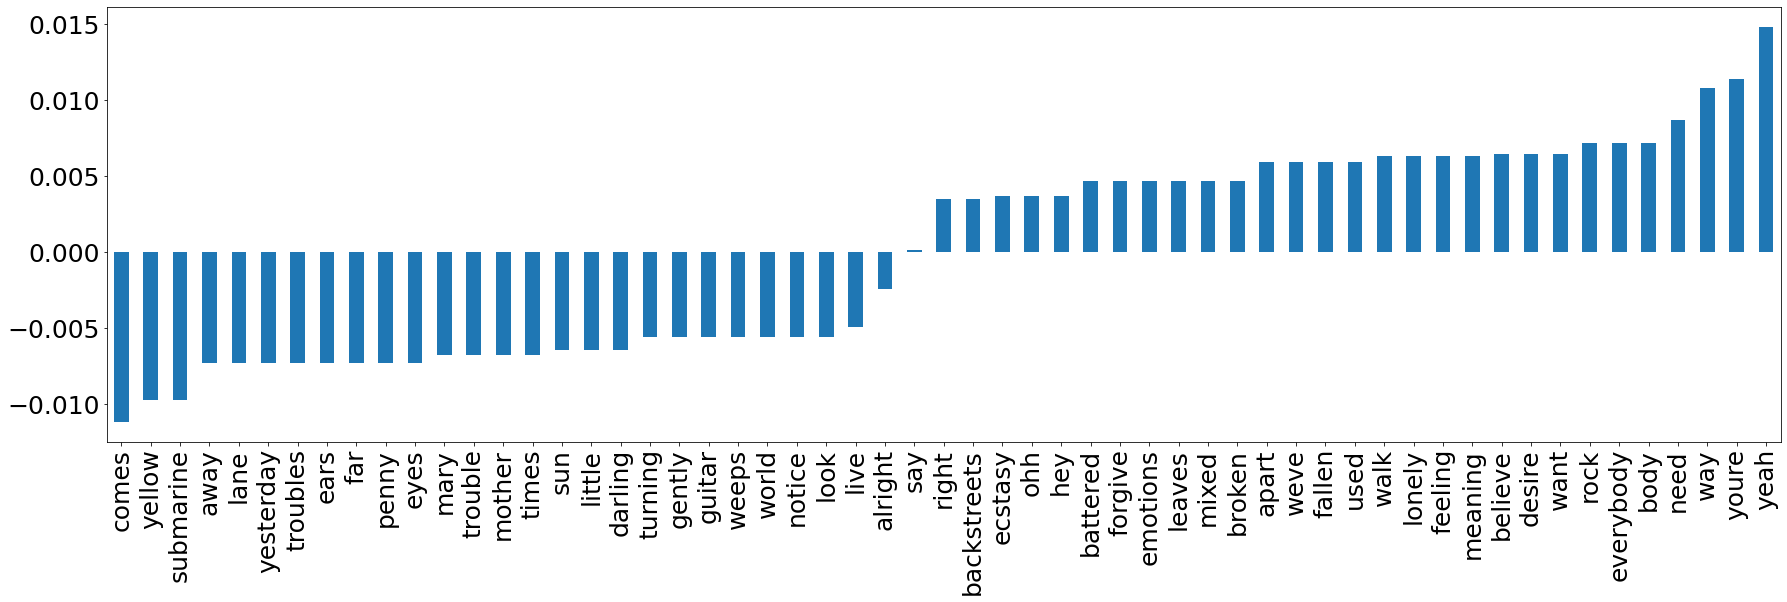

In [24]:
df['diff'].sort_values().plot.bar(figsize=(30, 8), fontsize=25)

---

### Further Experimentation: Naive Bayes models in Scikit-Learn:
- [The Gaussian NB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
    - assumes that the value of the features are normally (gaussian) distributed. 
    - doesn't work for our data set, but is used for 
- [The Multinomial NB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)
    - works similar to Gaussian naive Bayes; however the features are assumed to be multinomially distributed. In practice, this means that this classifier is commonly used when we have discrete data.
    - the one we use for this week's project, because word counts for text classification are a classic example of discrete data.
- [The Bernoulli NB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)
    - Like MultinomialNB, but better designed for binary/boolean features.
- [The Complement NB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html)
    - One of the newer ones; according to sklearn: "*was designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier. It is particularly suited for imbalanced data sets*".